In [79]:
import pandas as pd
df = pd.read_csv('adult.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [80]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [81]:
df['income'].value_counts(normalize= True)

income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

In [82]:
import numpy as np
df['income'] = np.where(df['income'] == '>50K', 'high', 'low')
df['income'].value_counts(normalize= True)

income
low     0.760718
high    0.239282
Name: proportion, dtype: float64

In [83]:
df = df.drop(columns= 'fnlwgt')

In [84]:
df_tmp = df[['sex']]
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     48842 non-null  object
dtypes: object(1)
memory usage: 381.7+ KB


In [85]:
df_tmp['sex'].value_counts()

sex
Male      32650
Female    16192
Name: count, dtype: int64

In [86]:
df_tmp = pd.get_dummies(df_tmp)
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex_Female  48842 non-null  bool 
 1   sex_Male    48842 non-null  bool 
dtypes: bool(2)
memory usage: 95.5 KB


In [87]:
df_tmp.head()

,sex_Female,sex_Male
0,False,True
1,False,True
2,False,True
3,False,True
4,True,False


In [88]:
target = df['income']           # income 추출

df = df.drop(columns= 'income') # income 제거
df = pd.get_dummies(df)         # 문자 타입 변수 원핫 인코딩

df['income'] = target           # df에 target 삽입
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Columns: 108 entries, age to income
dtypes: bool(102), int64(5), object(1)
memory usage: 7.0+ MB


In [89]:
import numpy as np
df.info(max_cols= np.inf)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 108 columns):
 #    Column                                     Non-Null Count  Dtype 
---   ------                                     --------------  ----- 
 0    age                                        48842 non-null  int64 
 1    education_num                              48842 non-null  int64 
 2    capital_gain                               48842 non-null  int64 
 3    capital_loss                               48842 non-null  int64 
 4    hours_per_week                             48842 non-null  int64 
 5    workclass_?                                48842 non-null  bool  
 6    workclass_Federal-gov                      48842 non-null  bool  
 7    workclass_Local-gov                        48842 non-null  bool  
 8    workclass_Never-worked                     48842 non-null  bool  
 9    workclass_Private                          48842 non-null  bool  
 10   workclass_Self-emp-i

In [90]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df,
                                     test_size= 0.3,         # 테스트 세트 비율
                                     stratify= df['income'], # 타겟 변수 비율 유지
                                     random_state= 1234)     # 난수 고정

In [91]:
df_train.shape

(34189, 108)

In [92]:
df_test.shape

(14653, 108)

In [93]:
df_train['income'].value_counts(normalize= True)

income
low     0.760713
high    0.239287
Name: proportion, dtype: float64

In [94]:
df_test['income'].value_counts(normalize= True)

income
low     0.760732
high    0.239268
Name: proportion, dtype: float64

In [95]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(random_state= 1234, # 난수 고정
                                  max_depth= 3)       # 나무 깊이

In [96]:
train_x = df_train.drop(columns= 'income') # 예측 변수 추출
train_y = df_train['income'] # 타겟 변수 추출

model = clf.fit(X = train_x, y = train_y) # 모델 만들기

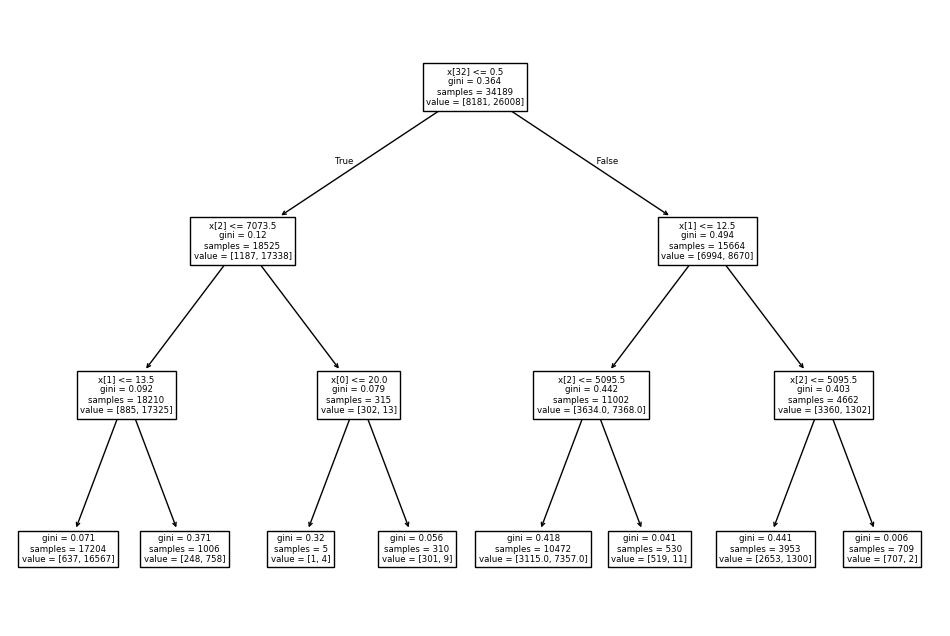

In [97]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi'       : '100',    # 해상도 설정
                     'figure.figsize'   : [12, 8]}) # 그래프 크기 설정

tree.plot_tree(model);
plt.show()

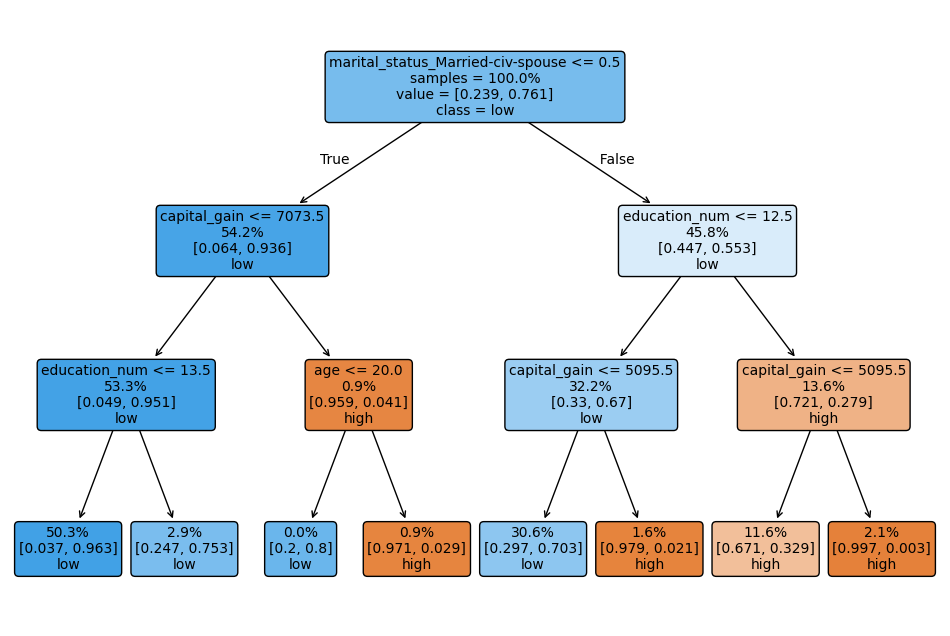

In [98]:
tree.plot_tree(model,
               feature_names= list(train_x.columns),    # 예측 변수 명
               class_names= ['high', 'low'],            # 타겟 클래스 알파벳 순
               proportion= True,                        # 비율 표기
               filled= True,                            # 색칠
               rounded= True,                           # 둥근 테두리
               impurity= False,                         # 불순도 표시
               label= 'root',                           # label 표시 위치
               fontsize= 10);                           # 글자 크기
plt.show()

In [99]:
test_x = df_test.drop(columns= 'income') # 예측 변수 추출
test_y = df_test['income']               # 타겟 변수 추출

In [100]:
# 예측값 구하기
df_test['pred'] = model.predict(test_x)
df_test

,age,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income,pred
11712,58,10,0,0,60,False,False,False,False,False,...,False,False,False,False,False,True,False,False,low,low
24768,39,10,0,0,40,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low
26758,31,4,0,0,20,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
14295,23,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
3683,24,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,24,13,0,0,30,False,False,False,False,True,...,False,False,False,False,False,True,False,False,low,low
48445,35,13,10520,0,45,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,high
19639,41,9,0,0,40,False,False,False,False,True,...,False,False,False,False,False,True,False,False,high,low
21606,29,4,0,0,30,False,False,False,False,True,...,False,False,False,False,False,False,False,False,low,low


In [101]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true= df_test['income'],  # 실제값
                            y_pred= df_test['pred'],    # 예측값
                            labels= ['high', 'low'])    # 클래스 배치 순서
conf_mat

array([[ 1801,  1705],
       [  582, 10565]])

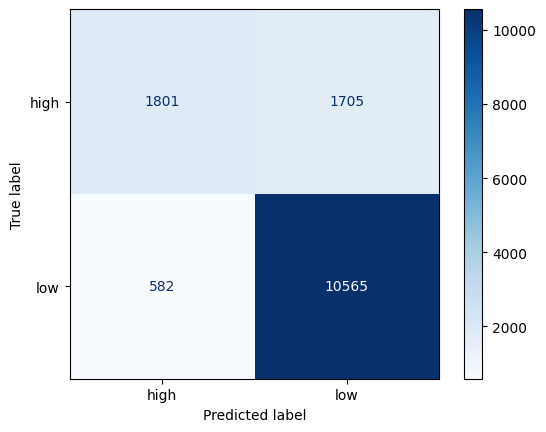

In [102]:
plt.rcParams.update(plt.rcParamsDefault) # 그래프 설정 되돌리기

from sklearn.metrics import ConfusionMatrixDisplay
p = ConfusionMatrixDisplay(confusion_matrix= conf_mat,      # 컨퓨전 매트릭스
                           display_labels= ('high', 'low')) # 타겟 변수 클래스 명

p.plot(cmap = 'Blues')                                      # 컬러맵 적용해 출력
plt.show()

In [103]:
import sklearn.metrics as metrics
metrics.accuracy_score(y_true= df_test['income'], # 실제값
                       y_pred= df_test['pred'])   # 예측값

0.8439227461953184

In [104]:
metrics.precision_score(y_true= df_test['income'], # 실제값
                        y_pred= df_test['pred'],   # 예측값
                        pos_label= 'high')         # 관심 클래스

0.7557700377675199

In [105]:
metrics.recall_score(y_true= df_test['income'], # 실제값
                     y_pred= df_test['pred'],   # 예측값
                     pos_label= 'high')         # 관심 클래스

0.5136908157444381

In [106]:
metrics.f1_score(y_true= df_test['income'], # 실제값
                 y_pred= df_test['pred'],   # 예측값
                 pos_label= 'high')         # 관심 클래스

0.6116488368143997